# HW6:  Analyzing Data Science in the StackOverflow Tech Job Survey

Every year Stackoverflow does a large survey of tech workers on jobs:
https://insights.stackoverflow.com/survey

Details about the data are below.

For this problem, we want you to extract part of the data involving <i>data science</i> and do two things:
(1) build a regression model to predict salary, and
(2) build a classifier model to predict the job title ("occupation").

You are encouraged to use Python for this assignment.
Python will be the default platform for the datasets in the Final Exam.

In [245]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
from patsy import dmatrices

import pandas as pd
from pandas import Series, DataFrame

import statsmodels.api as sm

from sklearn import datasets, svm



## Part 0:  Getting the Survey data

First, go to the survey site and download the 2016 data:
https://insights.stackoverflow.com/survey
    
(The results of the 2017 survey are there, but the data is not yet available for download now.)

For this problem, we want you to extract a subset of the data involving <i>data science</i>,
and compare the results for it with results for the entire dataset.

The <b>occupation</b> column in the dataset (i.e., column number 10)
involves job titles.  Please extract all rows that have
any of the job titles of interest here
(with the number of occurrences listed first):
<ul><li>
<b>Business intelligence or data warehousing expert</b> (392 occurrences)
</li><li>
<b>Data scientist</b> (800 occurrences)
</li><li>
<b>Developer with a statistics or mathematics background</b>  (960)
</li><li>
<b>Machine learning developer</b> (385).
</li></ul>

For this problem, extract all rows with these job titles into a <tt>DataScience</tt> table with about 2500 rows.

We also want you to consider the entire dataset; for simplicity let's call it <tt>JobSurvey</tt>.

<b>HOWEVER:  We want you to drop all rows with null values from</b> <tt>JobSurvey</tt>.

For each of the following parts, extract a model and compute its accuracy for each of these two datasets.


In [246]:
JobSurvey = pd.read_csv('2016 Stack Overflow Survey Responses.csv')

JobSurvey.shape

(56030, 66)

In [247]:
df1 = JobSurvey[JobSurvey.occupation == 'Business intelligence or data warehousing expert']
df2 = JobSurvey[JobSurvey.occupation == 'Data scientist']
df3 = JobSurvey[JobSurvey.occupation == 'Developer with a statistics or mathematics background']
df4 = JobSurvey[JobSurvey.occupation == 'Machine learning developer']

frames = [df1,df2,df3,df4]

DataScience = pd.concat(frames)

In [248]:
DataScience.shape

(2537, 66)

In [249]:
# #fill Na with max values
# DataScience.collector.fillna(DataScience.collector.dropna().max(),inplace=True)
# DataScience.country.fillna(DataScience.country.dropna().max(),inplace=True)
# DataScience.un_subregion.fillna(DataScience.un_subregion.dropna().max(),inplace=True)
# DataScience.so_region.fillna(DataScience.so_region.dropna().max(),inplace=True)
# DataScience.age_range.fillna(DataScience.age_range.dropna().max(),inplace=True)
# DataScience.age_midpoint.fillna(DataScience.age_midpoint.dropna().max(),inplace=True)
# DataScience.gender.fillna(DataScience.gender.dropna().max(),inplace=True)
# DataScience.self_identification.fillna(DataScience.self_identification.dropna().max(),inplace=True)
# DataScience.occupation.fillna(DataScience.occupation.dropna().max(),inplace=True)
# DataScience.occupation_group.fillna(DataScience.occupation_group.dropna().max(),inplace=True)
# DataScience.experience_range.fillna(DataScience.experience_range.dropna().max(),inplace=True)
# DataScience.experience_midpoint.fillna(DataScience.experience_midpoint.dropna().max(),inplace=True)
# DataScience.salary_range.fillna(DataScience.salary_range.dropna().max(),inplace=True)
# DataScience.salary_midpoint.fillna(DataScience.salary_midpoint.dropna().max(),inplace=True)
# DataScience.big_mac_index.fillna(DataScience.big_mac_index.dropna().max(),inplace=True)
# DataScience.tech_do.fillna(DataScience.tech_do.dropna().max(),inplace=True)
# DataScience.tech_want.fillna(DataScience.tech_want.dropna().max(),inplace=True)
# DataScience.aliens.fillna(DataScience.aliens.dropna().max(),inplace=True)
# DataScience.programming_ability.fillna(DataScience.programming_ability.dropna().max(),inplace=True)
# DataScience.employment_status.fillna(DataScience.employment_status.dropna().max(),inplace=True)
# DataScience.industry.fillna(DataScience.industry.dropna().max(),inplace=True)
# DataScience.company_size_range.fillna(DataScience.company_size_range.dropna().max(),inplace=True)
# DataScience.team_size_range.fillna(DataScience.team_size_range.dropna().max(),inplace=True)
# DataScience.women_on_team.fillna(DataScience.women_on_team.dropna().max(),inplace=True)
# DataScience.remote.fillna(DataScience.remote.dropna().max(),inplace=True)
# DataScience.job_satisfaction.fillna(DataScience.job_satisfaction.dropna().max(),inplace=True)
# DataScience.job_discovery.fillna(DataScience.job_discovery.dropna().max(),inplace=True)
# DataScience.dev_environment.fillna(DataScience.dev_environment.dropna().max(),inplace=True)
# DataScience.commit_frequency.fillna(DataScience.commit_frequency.dropna().max(),inplace=True)
# DataScience.hobby.fillna(DataScience.hobby.dropna().max(),inplace=True)
# DataScience.dogs_vs_cats.fillna(DataScience.dogs_vs_cats.dropna().max(),inplace=True)
# DataScience.desktop_os.fillna(DataScience.desktop_os.dropna().max(),inplace=True)
# DataScience.unit_testing.fillna(DataScience.unit_testing.dropna().max(),inplace=True)
# DataScience.rep_range.fillna(DataScience.rep_range.dropna().max(),inplace=True)
# DataScience.visit_frequency.fillna(DataScience.visit_frequency.dropna().max(),inplace=True)
# DataScience.why_learn_new_tech.fillna(DataScience.why_learn_new_tech.dropna().max(),inplace=True)
# DataScience.education.fillna(DataScience.education.dropna().max(),inplace=True)
# DataScience.open_to_new_job.fillna(DataScience.open_to_new_job.dropna().max(),inplace=True)
# DataScience.new_job_value.fillna(DataScience.new_job_value.dropna().max(),inplace=True)
# DataScience.job_search_annoyance.fillna(DataScience.job_search_annoyance.dropna().max(),inplace=True)
# DataScience.interview_likelihood.fillna(DataScience.interview_likelihood.dropna().max(),inplace=True)
# DataScience.how_to_improve_interview_process.fillna(DataScience.how_to_improve_interview_process.dropna().max(),inplace=True)
# DataScience.star_wars_vs_star_trek.fillna(DataScience.star_wars_vs_star_trek.dropna().max(),inplace=True)
# DataScience.agree_tech.fillna(DataScience.agree_tech.dropna().max(),inplace=True)
# DataScience.agree_notice.fillna(DataScience.agree_notice.dropna().max(),inplace=True)
# DataScience.agree_problemsolving.fillna(DataScience.agree_problemsolving.dropna().max(),inplace=True)
# DataScience.agree_diversity.fillna(DataScience.agree_diversity.dropna().max(),inplace=True)
# DataScience.agree_adblocker.fillna(DataScience.agree_adblocker.dropna().max(),inplace=True)
# DataScience.agree_alcohol.fillna(DataScience.agree_alcohol.dropna().max(),inplace=True)
# DataScience.agree_loveboss.fillna(DataScience.agree_loveboss.dropna().max(),inplace=True)
# DataScience.agree_nightcode.fillna(DataScience.agree_nightcode.dropna().max(),inplace=True)
# DataScience.agree_legacy.fillna(DataScience.agree_legacy.dropna().max(),inplace=True)
# DataScience.agree_mars.fillna(DataScience.agree_mars.dropna().max(),inplace=True)
# DataScience.important_variety.fillna(DataScience.important_variety.dropna().max(),inplace=True)
# DataScience.important_control.fillna(DataScience.important_control.dropna().max(),inplace=True)
# DataScience.important_sameend.fillna(DataScience.important_sameend.dropna().max(),inplace=True)
# DataScience.important_newtech.fillna(DataScience.important_newtech.dropna().max(),inplace=True)
# DataScience.important_buildnew.fillna(DataScience.important_buildnew.dropna().max(),inplace=True)
# DataScience.important_buildexisting.fillna(DataScience.important_buildexisting.dropna().max(),inplace=True)
# DataScience.important_promotion.fillna(DataScience.important_promotion.dropna().max(),inplace=True)
# DataScience.important_companymission.fillna(DataScience.important_companymission.dropna().max(),inplace=True)
# DataScience.important_wfh.fillna(DataScience.important_wfh.dropna().max(),inplace=True)
# DataScience.important_ownoffice.fillna(DataScience.important_ownoffice.dropna().max(),inplace=True)
# DataScience.developer_challenges.fillna(DataScience.developer_challenges.dropna().max(),inplace=True)
# DataScience.why_stack_overflow.fillna(DataScience.why_stack_overflow.dropna().max(),inplace=True)






In [250]:
JobSurvey_dropna = JobSurvey.dropna()

In [251]:
DataScience_dropna = DataScience.dropna()

## Part 1:  Predicting Salary

The texts in this course have presented a number of regression models for predicting numeric values.

Develop a "regression" model that predicts the <b>salary_midpoint</b> value (i.e., column number 15).

You should use "MSE" (Minimum Squared Error) as the accuracy measure.
Develop a model that reduces this error measure.

This is asking you to produce the best model you can for each of the two datasets
-- with the highest possible accuracy.
In other words, you are asked to produce to models, and report the accuracy of each of them.

In [252]:
##################################
#DataScience dataset

In [253]:
features = ['Unnamed: 0', 'collector', 'country', 'un_subregion', 'so_region',
       'age_range', 'age_midpoint', 'gender', 'self_identification',
       'occupation', 'occupation_group', 'experience_range',
       'experience_midpoint', 'salary_range', 'salary_midpoint',
       'big_mac_index', 'tech_do', 'tech_want', 'aliens',
       'programming_ability', 'employment_status', 'industry',
       'company_size_range', 'team_size_range', 'women_on_team', 'remote',
       'job_satisfaction', 'job_discovery', 'dev_environment',
       'commit_frequency', 'hobby', 'dogs_vs_cats', 'desktop_os',
       'unit_testing', 'rep_range', 'visit_frequency', 'why_learn_new_tech',
       'education', 'open_to_new_job', 'new_job_value', 'job_search_annoyance',
       'interview_likelihood', 'how_to_improve_interview_process',
       'star_wars_vs_star_trek', 'agree_tech', 'agree_notice',
       'agree_problemsolving', 'agree_diversity', 'agree_adblocker',
       'agree_alcohol', 'agree_loveboss', 'agree_nightcode', 'agree_legacy',
       'agree_mars', 'important_variety', 'important_control',
       'important_sameend', 'important_newtech', 'important_buildnew',
       'important_buildexisting', 'important_promotion',
       'important_companymission', 'important_wfh', 'important_ownoffice',
       'developer_challenges', 'why_stack_overflow', 'jobId']

drop_list = ['salary_midpoint','Unnamed: 0','age_midpoint','un_subregion','so_region','occupation_group','experience_midpoint']

In [254]:
from sklearn import preprocessing
le_rf = preprocessing.LabelEncoder()
X_rf = DataScience_dropna.drop('salary_midpoint',1)
X_rf = X_rf.drop('salary_range',1)
X_rf = X_rf.drop('Unnamed: 0',1).drop('age_midpoint',1).drop('un_subregion',1).drop('so_region',1)\
    .drop('occupation_group',1).drop('experience_midpoint',1)
X_rf_2 = X_rf.apply(le_rf.fit_transform)
y_rf = DataScience_dropna['salary_midpoint']

In [255]:
from sklearn.cross_validation import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf_2, y_rf, test_size=.2, random_state=42)

In [256]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1000)

# fit the model to the training data (learn the coefficients)
rfreg.fit(X_train_rf, y_train_rf)

y_pred_rf = rfreg.predict(X_test_rf)

In [257]:
#calculate MAE using scikit-learn
from sklearn import metrics
import numpy as np
print('MAE: ',metrics.mean_absolute_error(y_test_rf, y_pred_rf))

#calculate MSE using scikit-learn
print( 'MSE: ',metrics.mean_squared_error(y_test_rf, y_pred_rf))

# calculate RMSE using scikit-learn
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_rf, y_pred_rf)))

# print the R-squared value for the model
print('R-squared: ',rfreg.score(X_test_rf, y_test_rf))

#compute classification accuracy for the logistic regression model
#print(metrics.accuracy_score(y_test_rf, y_pred_rf))


MAE:  24625.433526
MSE:  1130393323.7
RMSE:  33621.3224561
R-squared:  0.5975152274


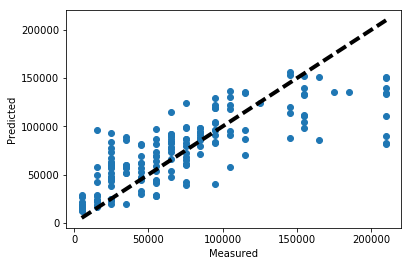

In [258]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test_rf, y_pred_rf)
ax.plot([y_rf.min(), y_rf.max()], [y_rf.min(), y_rf.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [259]:
##################################
#JobSurvey DataSet

In [260]:
le_rf_JS = preprocessing.LabelEncoder()

X_JS_rf = JobSurvey_dropna.drop('salary_midpoint',1)
X_JS_rf = X_JS_rf.drop('salary_range',1)
X_JS_rf = X_JS_rf.drop('Unnamed: 0',1).drop('age_midpoint',1).drop('un_subregion',1).drop('so_region',1)\
    .drop('occupation_group',1).drop('experience_midpoint',1)
X_JS_rf_2 = X_JS_rf.apply(le_rf_JS.fit_transform)
y_JS_rf = JobSurvey_dropna['salary_midpoint']

In [261]:
from sklearn.cross_validation import train_test_split
X_train_rf_JS, X_test_rf_JS, y_train_rf_JS, y_test_rf_JS = train_test_split(X_JS_rf_2, y_JS_rf , test_size=.2, random_state=42)

In [262]:
from sklearn.ensemble import RandomForestRegressor
rfreg_JS = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1000)

# fit the model to the training data (learn the coefficients)
rfreg_JS.fit(X_train_rf_JS, y_train_rf_JS)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1000,
           verbose=0, warm_start=False)

In [263]:
y_pred_rf_JS = rfreg_JS.predict(X_test_rf_JS)

In [264]:
#calculate MAE using scikit-learn
from sklearn import metrics
import numpy as np
print('MAE: ', metrics.mean_absolute_error(y_test_rf_JS, y_pred_rf_JS))

#calculate MSE using scikit-learn
print('MSE: ', metrics.mean_squared_error(y_test_rf_JS, y_pred_rf_JS))

# calculate RMSE using scikit-learn
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_rf_JS, y_pred_rf_JS)))

# print the R-squared value for the model
print('R-squared of Test values: ', rfreg_JS.score(X_test_rf_JS, y_test_rf_JS))

# compute classification accuracy for the logistic regression model
#print(metrics.accuracy_score(y_test_rf_JS, y_pred_rf_JS))

MAE:  19220.8881052
MSE:  758220441.648
RMSE:  27535.8029055
R-squared of Test values:  0.632134033859


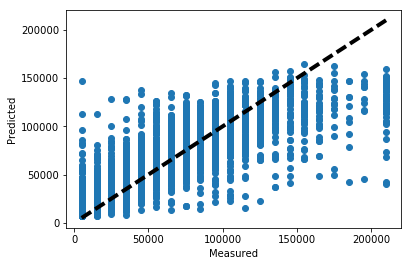

In [265]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(y_test_rf_JS, y_pred_rf_JS)
ax.plot([y_JS_rf.min(), y_JS_rf.max()], [y_JS_rf.min(), y_JS_rf.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Part 2:  Predicting Job Satisfaction

All of the tools covered in this course provide a large number of classifiers.

Develop a classifier model that predicts the <b>job satisfaction</b> value (i.e., column number 27).

More specifically, predict whether the value is <tt>"I love my job"</tt>.

Please use "accuracy rate" (percentage of correct predictions) as the measure of accuracy for this analysis.
For each of the two datasets, develop the best model you can -- with the highest possible accuracy.


In [266]:
##################################
#DataScience DataSet

In [267]:
from sklearn import preprocessing

DataScience_dropna_sat = DataScience_dropna.copy(deep=True)

mask = (DataScience_dropna_sat.job_satisfaction == 'I love my job')
DataScience_dropna_sat.loc[mask, 'job_satisfaction'] = 1
DataScience_dropna_sat.loc[~mask, 'job_satisfaction'] = 0 


le_rf = preprocessing.LabelEncoder()
X_rf = DataScience_dropna_sat.drop('job_satisfaction',1)
X_rf = X_rf.drop('Unnamed: 0',1).drop('age_midpoint',1).drop('un_subregion',1).drop('so_region',1)\
    .drop('occupation_group',1).drop('experience_midpoint',1)
X_rf_2 = X_rf.apply(le_rf.fit_transform)
y_rf = DataScience_dropna_sat['job_satisfaction']
#y_rf_2 = y_rf.apply(le_rf.fit_transform)

In [268]:
from sklearn.cross_validation import train_test_split
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf_2, y_rf, test_size=.2, random_state=42)

In [269]:
from sklearn.ensemble import RandomForestClassifier
rfreg = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=1000)

# fit the model to the training data (learn the coefficients)
rfreg.fit(X_train_rf, list(y_train_rf))

y_pred_rf = rfreg.predict(X_test_rf)

In [270]:
from sklearn import metrics
import numpy as np

# print the R-squared value for the model
#print('R-squared: ', rfreg.score(X_test_rf, np.array(y_test_rf, dtype=int)))

# compute classification accuracy for the logistic regression model
print('Accuracy: ', metrics.accuracy_score(np.array(y_test_rf, dtype=int), y_pred_rf))

Accuracy:  0.739884393064


In [271]:
##################################
#JobSurvey DataSet

In [272]:
JobSurvey_dropna_sat = JobSurvey_dropna.copy(deep=True)

mask = (JobSurvey_dropna_sat.job_satisfaction == 'I love my job')
JobSurvey_dropna_sat.loc[mask, 'job_satisfaction'] = 1
JobSurvey_dropna_sat.loc[~mask, 'job_satisfaction'] = 0 


le_rf = preprocessing.LabelEncoder()
X_rf_JS = JobSurvey_dropna_sat.drop('job_satisfaction',1)
X_rf_JS = X_rf_JS.drop('Unnamed: 0',1).drop('age_midpoint',1).drop('un_subregion',1).drop('so_region',1)\
    .drop('occupation_group',1).drop('experience_midpoint',1)
X_rf_JS_2 = X_rf_JS.apply(le_rf.fit_transform)
y_rf_JS = JobSurvey_dropna_sat['job_satisfaction']


In [273]:
from sklearn.cross_validation import train_test_split
X_train_JS_rf, X_test_JS_rf, y_train_JS_rf, y_test_JS_rf = train_test_split(X_rf_JS_2, y_rf_JS, test_size=.2, random_state=42)

In [274]:
from sklearn.ensemble import RandomForestClassifier
rfreg = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=1000)

# fit the model to the training data (learn the coefficients)
rfreg.fit(X_train_JS_rf, list(y_train_JS_rf))

y_pred_JS_rf = rfreg.predict(X_test_JS_rf)



In [275]:
#calculate MAE using scikit-learn
from sklearn import metrics
import numpy as np
#print(metrics.mean_absolute_error(y_test_rf, y_pred_rf))

#calculate MSE using scikit-learn
#print(metrics.mean_squared_error(y_test_rf, y_pred_rf))

# calculate RMSE using scikit-learn
#print(np.sqrt(metrics.mean_squared_error(y_test_rf, y_pred_rf)))

# print the R-squared value for the model
#print('R-squared: ',rfreg.score(X_test_JS_rf, np.array(y_test_JS_rf, dtype=int)))

# compute classification accuracy for the logistic regression model
print('Accuracy: ',metrics.accuracy_score(np.array(y_test_JS_rf, dtype=int), y_pred_JS_rf))

Accuracy:  0.761782622635
